In [1]:
import numpy as np

# Ex 1

In [2]:
s1 = np.array([0, -0.01])
s2 = np.array([0.01, 0])
t = np.array([4, 5])
a = np.array([-1, 3])

In [3]:
S = np.array([
    s1, s2
])

S_inv = np.linalg.inv(S.T)
a_new = S_inv.dot((a-t).T)
a_new

array([ 200., -500.])

# Check Ex 2

In [4]:
a = np.array([1, 2, 1])
a1 = np.array([9, 15, 1])

b = np.array([2, 1, 1])
b1 = np.array([8, 14, 1])

c = np.array([3, 3, 1])
c1 = np.array([16, 28, 1])

In [5]:
S = np.array([[2, 3, 1], 
              [4, 5, 1], 
              [0, 0, 1]])
a_new = S.dot(a.T)
np.equal(a_new, a1)

array([ True,  True,  True])

In [6]:
b_new = S.dot(b.T)
np.equal(b_new, b1)

array([ True,  True,  True])

In [7]:
c_new = S.dot(c.T)
np.equal(c_new, c1)

array([ True,  True,  True])

# Ex 3

In [8]:
b = np.array([3, 3, 3])

x + 2z = y

In [9]:
n = np.array([1, -1, 2])

a1 = [1, 3, 1]
a2 = [-1, -5, -2]
a = np.array([a1, a2]).T
a

array([[ 1, -1],
       [ 3, -5],
       [ 1, -2]])

In [10]:
p = a.dot(np.linalg.inv(a.T.dot(a))).dot(a.T)
x = p.dot(b)
x

array([2., 4., 1.])

In [11]:
p

array([[ 0.83333333,  0.16666667, -0.33333333],
       [ 0.16666667,  0.83333333,  0.33333333],
       [-0.33333333,  0.33333333,  0.33333333]])

# Ex 4

In [12]:
import os
import pandas as pd
from PIL import Image

In [13]:
data_folder = "data/"
cats_eyes = pd.read_csv(os.path.join(data_folder, 'cats.csv'))
cats_eyes

,file,x1,y1,x2,y2
0,cat-1.jpg,137,191,252,194
1,cat-2.jpg,745,625,1128,571
2,cat-3.jpg,340,315,560,315
3,cat-4.jpg,398,308,574,289
4,cat-5.jpg,418,422,573,545


In [14]:
u1, v1 = (44, 64)
u2, v2 = (84, 64)

def get_A(x1, x2, y1, y2):
    m = np.array([
        [x1, -y1, 1, 0],
        [y1, x1, 0, 1],
        [x2, -y2, 1, 0],
        [y2, x2, 0, 1]
    ])
    c, s, tx, ty = np.linalg.inv(m).dot(np.array([u1, v1, u2, v2]))
    A = np.linalg.inv([
        [c, -s, tx],
        [s, c, ty],
        [0, 0, 1]
    ])
    return A

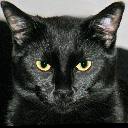

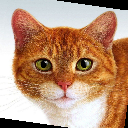

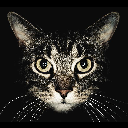

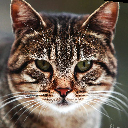

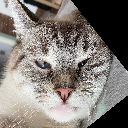

In [16]:
target_size = (128, 128)

for cat in cats_eyes.itertuples():
    im = Image.open(os.path.join(data_folder, cat.file))
    x1, x2, y1, y2 = cat.x1, cat.x2, cat.y1, cat.y2
    A = get_A(x1, x2, y1, y2)
    new_im = im.transform(target_size, Image.AFFINE, A.flatten())
    display(new_im)